# Relationship Between Duration of Ride With Other Characteristics of Trips
## by (Solomon Chikwendu)

## Investigation Overview


For the presentation, I focused on the influence of the customer type and gender on duration of trips
 


## Dataset Overview

The data consisted of duration and attributes of approximately 175,000 bike trips covering the greater San Francisco Bay area. The attributes included member gender, user type, start time, start station name, bike_share_for_all_trip etc. Eight thousand four hundred and fifty data points were removed from the analysis duue to missing information

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# Convert start_time, end_time to datetime
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

# Drop missing values
df.dropna(inplace=True)

# Extract year, month, day and hour from start time and end time
df['start_year'] = df.start_time.dt.year
df['start_month'] = df.start_time.dt.month
df['start_day'] = df.start_time.dt.day_of_week
df['start_hour'] = df.start_time.dt.hour
df['end_year'] = df.end_time.dt.year
df['end_month'] = df.end_time.dt.month
df['end_day'] = df.end_time.dt.day_of_week
df['end_hour'] = df.end_time.dt.hour

## Distribution of Rides Duration

Rides within the range duration of 200 - 400 seconds are most common. The number of rides descreases as the duration of ride increase. The slight increase in the 1000 - 2000 duration is as a result of the increased group size from 200 to 1000.

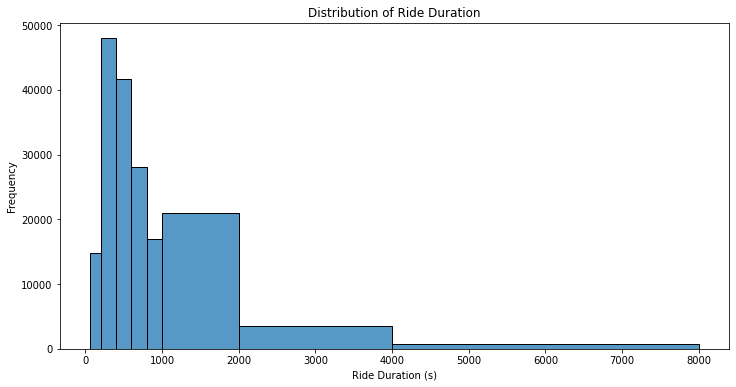

In [5]:
plt.figure(figsize=[12, 6])
bin = np.arange(60, df.duration_sec.max()+ 1000, 1000)
sb.histplot(data=df, x=df.duration_sec, bins=[60, 200, 400, 600, 800, 1000, 2000, 4000, 8000])
plt.title('Distribution of Ride Duration')
plt.xlabel('Ride Duration (s)')
plt.ylabel('Frequency');

## Start Day vs Duration vs Gender

The chart shows that irrespective of the day, it takes lesser time for male to complete a ride compared to female and other gender. The duration of rides for male is almost the same during the week. We can also see the huge variances in duration for other gender which is highest on Sunday.

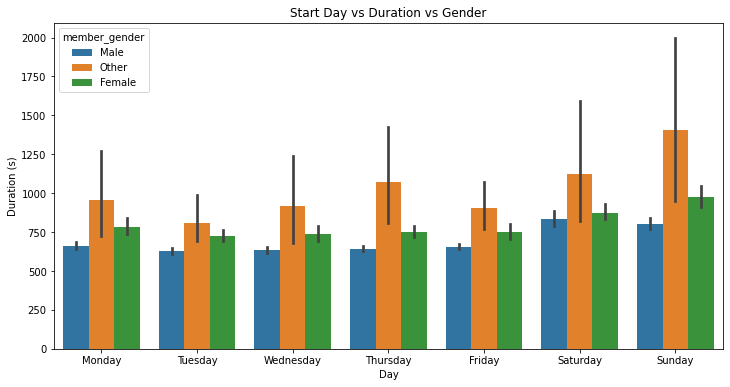

In [6]:
# Let's replace the numbers with their actual day of week
df.start_day.replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)
df.end_day.replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)

weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=[12,6])
sb.barplot(x='start_day', y='duration_sec', hue='member_gender', data=df, order=weeks)
plt.title('Start Day vs Duration vs Gender')
plt.xlabel('Day')
plt.ylabel('Duration (s)');

## Start Time

The higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) can be linked to the rush hours where people are leaving for work and come later in the evening. Rides are usually low in the early hours of the morning between 12am to 5am. This could be because people are still asleep. Rides starts increasing from 6am till 8am which is the peak period.

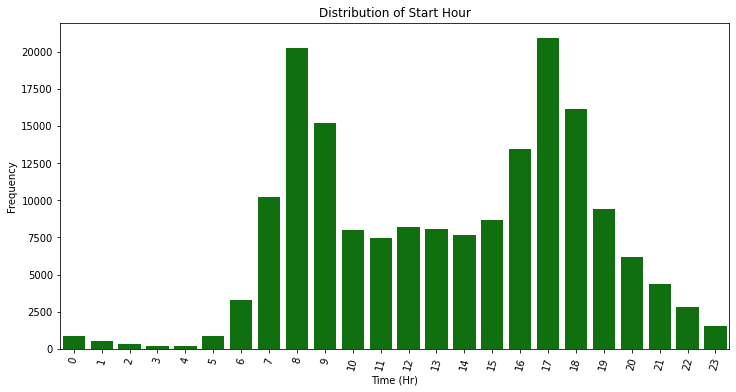

In [7]:
start_hour = df.start_hour.value_counts()
start_hour

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Distribution of Start Hour')
sb.barplot(x=start_hour.index, y=start_hour, color='green')
plt.xlabel('Time (Hr)')
plt.ylabel('Frequency');

In [12]:
!jupyter nbconvert Ford-GoBike-Part2.ipynb --to slides --post serve --no-input --no-prompt --port=8085

[NbConvertApp] WARNING | Unrecognized alias: 'port', it will have no effect.
[NbConvertApp] Converting notebook Ford-GoBike-Part2.ipynb to slides
[NbConvertApp] Writing 634711 bytes to Ford-GoBike-Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\MENKA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "C:\Users\MENKA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3